In [1]:
%matplotlib notebook
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.widgets import RadioButtons
from matplotlib.patches import Rectangle

#http://www.ncaa.org/about/resources/research/shared-ncaa-research-data
#https://ncaaorg.s3.amazonaws.com/research/gradrates/data/2018RES_Codebook5-DISquadAggregationSA.pdf


In [2]:
import matplotlib.pyplot as plt
from matplotlib.widgets import AxesWidget, RadioButtons

class MyRadioButtons(RadioButtons):

    def __init__(self, ax, labels, active=0, activecolor='blue', size=80,
                 orientation="vertical", **kwargs):
        """
        Add radio buttons to an `~.axes.Axes`.
        Parameters
        ----------
        ax : `~matplotlib.axes.Axes`
            The axes to add the buttons to.
        labels : list of str
            The button labels.
        active : int
            The index of the initially selected button.
        activecolor : color
            The color of the selected button.
        size : float
            Size of the radio buttons
        orientation : str
            The orientation of the buttons: 'vertical' (default), or 'horizontal'.
        Further parameters are passed on to `Legend`.
        """
        AxesWidget.__init__(self, ax)
        self.activecolor = activecolor
        axcolor = ax.get_facecolor()
        self.value_selected = None

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_navigate(False)

        circles = []
        for i, label in enumerate(labels):
            if i == active:
                self.value_selected = label
                facecolor = activecolor
            else:
                facecolor = axcolor
            p = ax.scatter([],[], s=size, marker="o", edgecolor='#175873', alpha=.7, #for circles
                           facecolor=facecolor)
            circles.append(p)
        if orientation == "horizontal":
            kwargs.update(ncol=len(labels), mode="expand")
        kwargs.setdefault("frameon", False)    
        self.box = ax.legend(circles, labels, loc="center", **kwargs)
        for text in self.box.get_texts():
            plt.setp(text, color = '#394450')
        self.labels = self.box.texts
        self.circles = self.box.legendHandles
        for c in self.circles:
            c.set_picker(5)
        self.cnt = 0
        self.observers = {}

        self.connect_event('pick_event', self._clicked)


    def _clicked(self, event):
        if (self.ignore(event) or event.mouseevent.button != 1 or
            event.mouseevent.inaxes != self.ax):
            return
        if event.artist in self.circles:
            self.set_active(self.circles.index(event.artist))

In [3]:
unies = pd.read_csv('CollegeNavigator_Search_2019-11-05_12.51.15.csv',  engine='python')

grades = pd.read_csv('2018RES_File5-DISquadAggregationSA.csv')
grades.rename(columns={'SCL_NAME':'Name',
                          'SPORT':'Sport'}, 
                 inplace=True)

unies['Name']=[re.sub( '-.*', '', str(x)) for x in unies['Name']]
unies=unies.drop_duplicates(subset='Name', keep="first")

df= unies[['Name', 'Address']].merge(grades[['Name','Sport', 'FED_RATE','GSR']], on = 'Name',how = 'inner')
df

,Name,Address,Sport,FED_RATE,GSR
0,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",WFH,75.0,95.0
1,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",WVB,91.0,100.0
2,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",WSB,89.0,100.0
3,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",WGY,57.0,89.0
4,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",MBB,23.0,70.0
5,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",WSO,72.0,96.0
6,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",MBA,56.0,70.0
7,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",MWR,57.0,71.0
8,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",WTR,88.0,100.0
9,Central Michigan University,"106 Warriner Hall, Mount Pleasant, Michigan 48859",WBB,67.0,93.0


<IPython.core.display.Javascript object>


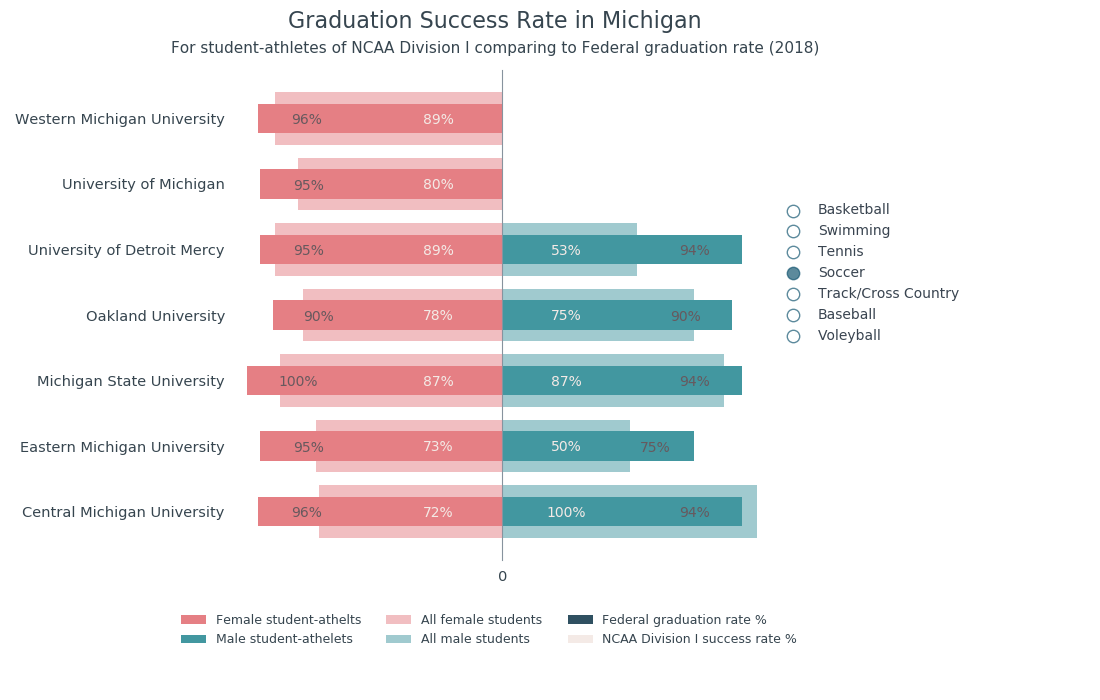

In [5]:
fig, axes = plt.subplots(ncols=2, sharey=True)
fig.text(0.45, 0.96, "Graduation Success Rate in Michigan", fontsize=16, color='#36454F', ha='center')
fig.text(0.45, 0.93, 'For student-athletes of NCAA Division I comparing to Federal graduation rate (2018)',
         size=11,  color='#36454F', ha='center', va='center')
plt.rcParams["figure.figsize"] = (11,7)
firstrun = True
def build_plot(sportname):
    global firstrun
    axes[0].clear()
    axes[1].clear()
    letter = "M"
    tcksW = len(df[df['Sport'] == 'W'+sportname]['Name'])
    tcksM = len(df[df['Sport'] == 'M'+sportname]['Name'])
    if  tcksW>tcksM:
        letter = "W"
        ticks = tcksW
    else:
        ticks = tcksM
    rects1=axes[0].barh(df[df['Sport'] == 'W'+sportname]['Name'], df[df['Sport'] == 'W'+sportname]['FED_RATE'],
                        align='center', color='#E57F84', alpha=.5)
    rects2=axes[1].barh(df[df['Sport'] == 'M'+sportname]['Name'], df[df['Sport'] == 'M'+sportname]['FED_RATE'],
                        align='center', color='#4297A0', alpha=.5)
    axes[0].invert_xaxis()
    #plt.yticks(df[df['Sport'] == 'W'+sportname]['Name']) 
    rects=[rects1, rects2]
    for j in range(len(rects)):
        x,y=0,0
        for i, patch in enumerate(rects[j].get_children()):
            bl = patch.get_xy()
            x = 25 + bl[0]
            y = 0.4*patch.get_height() + bl[1]
            axes[j].text(x,y, "%d%%" % int(patch.get_width()), ha='center', color='#F4EAE6')
    
    rects3=axes[0].barh(df[df['Sport'] == 'W'+sportname]['Name'], df[df['Sport'] == 'W'+sportname]['GSR'],
                        .45, align='center', color='#E57F84')
    rects4=axes[1].barh(df[df['Sport'] == 'M'+sportname]['Name'], df[df['Sport'] == 'M'+sportname]['GSR'],
                        .45, align='center', color='#4297A0')
    plt.sca(axes[1])
    plt.yticks(range(ticks),df[df['Sport'] == letter+sportname]['Name'])
    fig.tight_layout()
    fig.subplots_adjust(top=.9, bottom = 0.2, right=.7, wspace=0)
        #plt.title('Add text for each bar with matplotlib')   top=.9, add title location
    rects=[rects3, rects4]
    for j in range(len(rects)):
        x,y=0,0
        for i, patch in enumerate(rects[j].get_children()):
            bl = patch.get_xy()
            x = 0.8*patch.get_width() + bl[0]
            y = 0.3*patch.get_height() + bl[1]
            axes[j].text(x,y, "%d%%" % int(patch.get_width()), ha='center', color='#67595E')
    for i in [0,1]:
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['bottom'].set_visible(False)
        axes[i].tick_params(bottom=False, left=False)
        axes[i].tick_params(axis='both', colors='#36454F', labelsize=10.5)
    axes[0].set_xticks([0], [])
    axes[1].set_xticks([], [])
    axes[0].spines['left'].set_visible(False)
    axes[1].spines['left'].set_color('#87939E')

    grey = Rectangle((0, 0), 1, 1, fc="#2F5061", fill=True, edgecolor='none', linewidth=0)
    ivory = Rectangle((0, 0), 1, 1, fc="#F4EAE6", fill=True, edgecolor='none', linewidth=0)
    if firstrun==True:
        leg=fig.legend( [rects3, rects4, rects1, rects2, grey, ivory],
                       ('Female student-athelts', 'Male student-athelets','All female students', 'All male students',
                        'Federal graduation rate %','NCAA Division I success rate %' ), bbox_to_anchor=(.16, .13), loc=2, borderaxespad=0., frameon=False,
                       framealpha=1, ncol=3, prop={'size': 9} )
        for text in leg.get_texts():
            plt.setp(text, color = '#36454F')
        firstrun = False

    plt.show()
    
rax = plt.axes([0.7, 0.5, 0.18,0.22], facecolor="w")
for pos in ['right','top','bottom','left']:
    rax.spines[pos].set_visible(False)
radio = MyRadioButtons(rax, ['Basketball', 'Swimming', 'Tennis', 'Soccer', 'Track/Cross Country', 'Baseball','Voleyball'],
                      active=0, ncol=1, activecolor='#175873')



def switchsport(label):
    sdict = {'Basketball': "BB", 'Swimming': "SW", 'Tennis': "TE", 'Soccer':"SO",
            'Track/Cross Country': "TR", 'Baseball':"BA",'Voleyball':"VB" }
    build_plot(sdict[label])

radio.on_clicked(switchsport)
build_plot("BB")